In [1]:
import pandas as pd
import csv 
import json
import time
import os
from pymongo import MongoClient
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
spotify_csv = pd.read_csv('Spotify 2010 - 2019 Top 100.csv', encoding = 'utf-8')
print('Last modification date:', time.ctime(os.path.getctime('Spotify 2010 - 2019 Top 100.csv'))) 
spotify_csv.info()

Last modification date: Mon Apr 18 10:16:09 2022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      1000 non-null   object
 1   artist                     1000 non-null   object
 2   genre                      1000 non-null   object
 3   year released              1000 non-null   int64 
 4   date added to list         1000 non-null   object
 5   beats per minute           1000 non-null   int64 
 6   energetic rate             1000 non-null   int64 
 7   danceability rate          1000 non-null   int64 
 8   decibel                    1000 non-null   int64 
 9   probability is live song   1000 non-null   int64 
 10  positivity rate            1000 non-null   int64 
 11  duration                   1000 non-null   int64 
 12  acoustic rate              1000 non-null   int64 
 13  focus on spoken

In [ ]:
display(spotify_csv.iloc[1:11])

In [ ]:
display(spotify_csv[['title','duration']])

In [ ]:
spotify_csv.duration.describe()

In [ ]:
spotify_csv.sort_values(['beats per minute'], ascending = 0) 

In [ ]:
spotify_csv.loc[(spotify_csv['top year'] == 2019)]

In [ ]:
spotify_csv.loc[(spotify_csv['popularity'] < 50)]

In [ ]:
songs_to_dance = spotify_csv.title.loc[spotify_csv['danceability rate'] >= 70] 
songs_to_dance.count()

In [ ]:
spotify_csv.loc[(spotify_csv['acoustic rate'] == spotify_csv['acoustic rate'].max())]

In [ ]:
spotify_csv.loc[(spotify_csv['acoustic rate'] == spotify_csv['acoustic rate'].min())]

In [ ]:
spotify_csv[(spotify_csv['genre'].str.contains('hip hop') | (spotify_csv['genre'].str.contains('pop')) 
    & spotify_csv['artist type'].str.contains('Solo'))]

In [ ]:
spotify_csv.groupby(['artist type']).mean()

In [ ]:
spotify_csv.sort_values(by = ['date added to list'], ascending = 0) 

In [ ]:
spotify_csv.groupby(['genre']).sum()

In [ ]:
spotify_csv.groupby(['top year']).count()

In [ ]:
spotify_csv['beats per minute'].hist()

In [ ]:
def search_songs_by_duration_range(min_duration, max_duration):
    searched_songs = spotify_csv.loc[(spotify_csv.duration >= min_duration) & (spotify_csv.duration <= max_duration)]
    sorted_songs = searched_songs.sort_values(by = ['duration'], ascending = 0) 
    display(sorted_songs)
    
search_songs_by_duration_range(100, 220)

In [ ]:
def search_songs_by_genre(genre_to_find):
    display(spotify_csv.loc[spotify_csv['genre'].str.contains(genre_to_find)])  
     
search_songs_by_genre('dance pop')

In [ ]:
def search_songs_by_title_keyword(keyword):
    display(spotify_csv.loc[(spotify_csv['title'].str.contains(keyword))])   
    
search_songs_by_title_keyword('You')

In [ ]:
def convert_csv_to_json(csv_file_path, json_file_path):
    json_array = []
    with open(csv_file_path, encoding = 'utf-8') as csv_file: 
        csv_dict_reader = csv.DictReader(csv_file) 
        for row in csv_dict_reader: 
            json_array.append(row)
  
    with open(json_file_path, 'w', encoding = 'utf-8') as json_file: 
        json_text = json.dumps(json_array, indent = 4)
        json_file.write(json_text)
          
csv_file_path = r'Spotify 2010 - 2019 Top 100.csv'
json_file_path = r'SpotifyTop100Songs.json'

convert_csv_to_json(csv_file_path, json_file_path)

In [4]:
spotify_json = pd.read_json('SpotifyTop100Songs.json', encoding = 'utf-8')

In [5]:
mongo_client = MongoClient('mongodb://localhost:27017')
spotify_database = mongo_client['SpotifyTop100Songs']

In [6]:
songs_collection = spotify_database.Top100SpotifySongs
songs_dict = spotify_json.to_dict('records')

In [7]:
songs_collection.insert_many(songs_dict)

In [8]:
all_docs_number = songs_collection.count_documents({})
print('The total number of documents in Top100SpotifySongs collection:', all_docs_number) 

The total number of documents in Top100SpotifySongs collection: 1000


In [ ]:
first_100_songs = songs_collection.find({}).limit(100)
for song in first_100_songs:
    print(song)

In [ ]:
edm_songs = songs_collection.find({'genre':'edm'})
for edm_song in edm_songs:
    display(edm_song) 

In [ ]:
loud_songs = songs_collection.find({'decibel':{'$lt':-5}, 'beats per minute':{'$gt': 100}}).sort('beats per minute', -1)
for loud_song in loud_songs:
    display(loud_song) 

In [ ]:
year2016_or_more_songs = songs_collection.find({'year released':{'$gte':2016}}).sort('year released')
for year2016_or_more_song in year2016_or_more_songs:
    display(year2016_or_more_song) 

In [ ]:
group_songs = songs_collection.find({'artist type':{'$ne':'Solo'}})
for group_song in group_songs:
    display(group_song) 

In [20]:
rihanna_songs = songs_collection.find({'artist':{'$in':['Rihanna']}})
for rihanna_song in rihanna_songs:
    display(rihanna_song) 

{'_id': ObjectId('625fb7e085dc565df379e617'),
 '\ufefftitle': 'Only Girl (In The World)',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2010,
 'date added to list': '2022‑02‑17',
 'beats per minute': 126,
 'energetic rate': 71,
 'danceability rate': 79,
 'decibel': -4,
 'probability is live song ': 6,
 'positivity rate': 64,
 'duration': 235,
 'acoustic rate': 11,
 'focus on spoken words': 4,
 'popularity': 82,
 'top year': 2010,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e618'),
 '\ufefftitle': 'Rude Boy',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2009,
 'date added to list': '2022‑02‑17',
 'beats per minute': 174,
 'energetic rate': 75,
 'danceability rate': 56,
 'decibel': -4,
 'probability is live song ': 8,
 'positivity rate': 81,
 'duration': 223,
 'acoustic rate': 11,
 'focus on spoken words': 13,
 'popularity': 80,
 'top year': 2010,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e619'),
 '\ufefftitle': "What's My Name?",
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2010,
 'date added to list': '2022‑02‑17',
 'beats per minute': 100,
 'energetic rate': 78,
 'danceability rate': 69,
 'decibel': -3,
 'probability is live song ': 8,
 'positivity rate': 56,
 'duration': 263,
 'acoustic rate': 18,
 'focus on spoken words': 7,
 'popularity': 75,
 'top year': 2010,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e61a'),
 '\ufefftitle': 'Man Down',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2010,
 'date added to list': '2022‑02‑17',
 'beats per minute': 156,
 'energetic rate': 91,
 'danceability rate': 48,
 'decibel': -4,
 'probability is live song ': 5,
 'positivity rate': 54,
 'duration': 267,
 'acoustic rate': 4,
 'focus on spoken words': 19,
 'popularity': 65,
 'top year': 2010,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e61b'),
 '\ufefftitle': 'Hard',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2009,
 'date added to list': '2022‑02‑17',
 'beats per minute': 182,
 'energetic rate': 75,
 'danceability rate': 31,
 'decibel': -4,
 'probability is live song ': 65,
 'positivity rate': 16,
 'duration': 251,
 'acoustic rate': 1,
 'focus on spoken words': 11,
 'popularity': 60,
 'top year': 2010,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e692'),
 '\ufefftitle': 'S&M',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2010,
 'date added to list': '2020‑06‑16',
 'beats per minute': 128,
 'energetic rate': 68,
 'danceability rate': 77,
 'decibel': -5,
 'probability is live song ': 9,
 'positivity rate': 84,
 'duration': 244,
 'acoustic rate': 1,
 'focus on spoken words': 4,
 'popularity': 82,
 'top year': 2011,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e693'),
 '\ufefftitle': 'We Found Love',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2011,
 'date added to list': '2020‑06‑16',
 'beats per minute': 128,
 'energetic rate': 77,
 'danceability rate': 74,
 'decibel': -4,
 'probability is live song ': 11,
 'positivity rate': 60,
 'duration': 215,
 'acoustic rate': 3,
 'focus on spoken words': 4,
 'popularity': 80,
 'top year': 2011,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e694'),
 '\ufefftitle': "What's My Name?",
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2010,
 'date added to list': '2020‑06‑16',
 'beats per minute': 100,
 'energetic rate': 78,
 'danceability rate': 69,
 'decibel': -3,
 'probability is live song ': 8,
 'positivity rate': 56,
 'duration': 263,
 'acoustic rate': 18,
 'focus on spoken words': 7,
 'popularity': 75,
 'top year': 2011,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e6ef'),
 '\ufefftitle': 'We Found Love',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2011,
 'date added to list': '2020‑06‑22',
 'beats per minute': 128,
 'energetic rate': 77,
 'danceability rate': 74,
 'decibel': -4,
 'probability is live song ': 11,
 'positivity rate': 60,
 'duration': 215,
 'acoustic rate': 3,
 'focus on spoken words': 4,
 'popularity': 80,
 'top year': 2012,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e6f0'),
 '\ufefftitle': 'Where Have You Been',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2011,
 'date added to list': '2020‑06‑22',
 'beats per minute': 128,
 'energetic rate': 85,
 'danceability rate': 72,
 'decibel': -6,
 'probability is live song ': 22,
 'positivity rate': 44,
 'duration': 243,
 'acoustic rate': 0,
 'focus on spoken words': 9,
 'popularity': 76,
 'top year': 2012,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e80d'),
 '\ufefftitle': 'FourFiveSeconds',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2015,
 'date added to list': '2020‑06‑19',
 'beats per minute': 206,
 'energetic rate': 27,
 'danceability rate': 58,
 'decibel': -6,
 'probability is live song ': 13,
 'positivity rate': 35,
 'duration': 188,
 'acoustic rate': 88,
 'focus on spoken words': 5,
 'popularity': 82,
 'top year': 2015,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e80e'),
 '\ufefftitle': 'Bitch Better Have My Money',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2015,
 'date added to list': '2020‑06‑19',
 'beats per minute': 103,
 'energetic rate': 73,
 'danceability rate': 78,
 'decibel': -5,
 'probability is live song ': 26,
 'positivity rate': 40,
 'duration': 219,
 'acoustic rate': 5,
 'focus on spoken words': 6,
 'popularity': 78,
 'top year': 2015,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e87b'),
 '\ufefftitle': 'Needed Me',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2016,
 'date added to list': '2020‑06‑08',
 'beats per minute': 111,
 'energetic rate': 31,
 'danceability rate': 67,
 'decibel': -8,
 'probability is live song ': 8,
 'positivity rate': 30,
 'duration': 192,
 'acoustic rate': 11,
 'focus on spoken words': 24,
 'popularity': 84,
 'top year': 2016,
 'artist type': 'Solo'}

{'_id': ObjectId('625fb7e085dc565df379e87c'),
 '\ufefftitle': 'Work',
 'artist': 'Rihanna',
 'genre': 'barbadian pop',
 'year released': 2016,
 'date added to list': '2020‑06‑08',
 'beats per minute': 92,
 'energetic rate': 53,
 'danceability rate': 73,
 'decibel': -6,
 'probability is live song ': 9,
 'positivity rate': 56,
 'duration': 219,
 'acoustic rate': 8,
 'focus on spoken words': 9,
 'popularity': 80,
 'top year': 2016,
 'artist type': 'Solo'}

In [ ]:
no_pop_songs = songs_collection.find({'genre':{'$nin':['dance pop', 'pop soul','pop rap', 'art pop', 'pop', 'barbadian pop',
    'acoustic pop', 'belgian pop', 'baroque pop', 'indie pop', 'australian pop','canadian pop', 'folk-pop', 'austrian pop', 
    'irish pop', 'chill pop', 'indie pop rap', 'electropop']}})
for no_pop_song in no_pop_songs:
    print(no_pop_song)

In [ ]:
solo_and_duo_songs = songs_collection.find({'$nor':[{'artist type': 'Band/Group'}, {'artist type': 'Trio'}]})
for solo_and_duo_song in solo_and_duo_songs:
    print(solo_and_duo_song)                                      

In [ ]:
year_2018_and_2019_songs = songs_collection.find({'$or':[{'top year': 2018}, {'top year': 2019}]})
for year_2018_and_2019_song in year_2018_and_2019_songs:
    print(year_2018_and_2019_song)    

<Figure size 432x288 with 0 Axes>

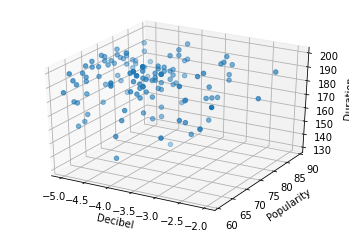

In [16]:
query = { 
    'decibel': { '$gte': -5 }, 
    'popularity': { '$gt': 60 },
    'duration': { '$lt': 200 },
}
   
query_list = list(songs_collection.find(query))
decibel = [x['decibel'] for x in query_list]
popularity = [x['popularity'] for x in query_list]
duration = [x['duration'] for x in query_list]
   
plt.clf()
fig = plt.figure()
  
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(decibel, popularity, duration)
  
ax.set_xlabel('Decibel')
ax.set_ylabel('Popularity')
ax.set_zlabel('Duration')
  
plt.show()

In [23]:
#songs_collection.drop()